In [4]:
# Tree-based Regression Comparison

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
df = pd.read_csv("D:\GERMANY\SRH_MScADSA\Sem1\SnML_Submissions\housing.csv")  # make sure housing.csv is in the same folder
df = df.dropna()
target_col = "median_house_value"



In [6]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




Decision Tree Results:
MSE  : 4528796036.45
RMSE : 67296.33
R²   : 0.6688


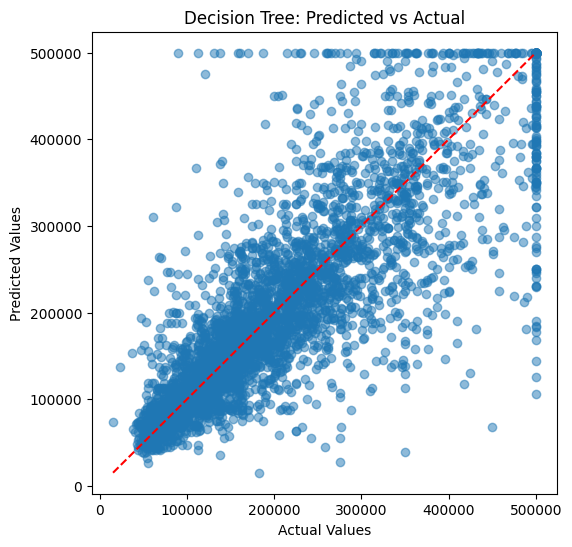


Random Forest Results:
MSE  : 2378317289.57
RMSE : 48767.99
R²   : 0.8261


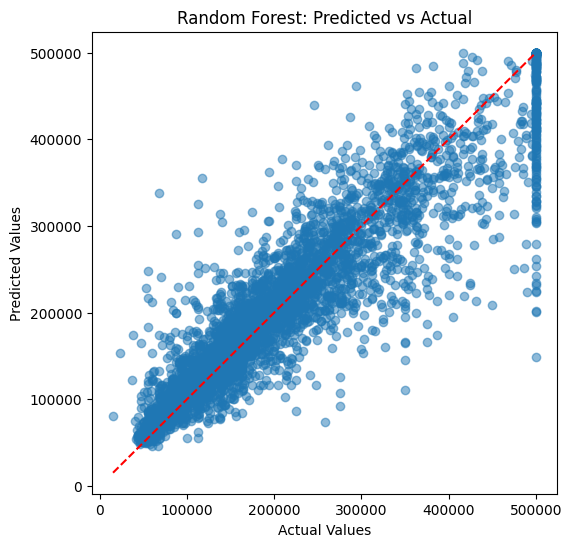


Extra Trees Results:
MSE  : 2720826841.33
RMSE : 52161.55
R²   : 0.8010


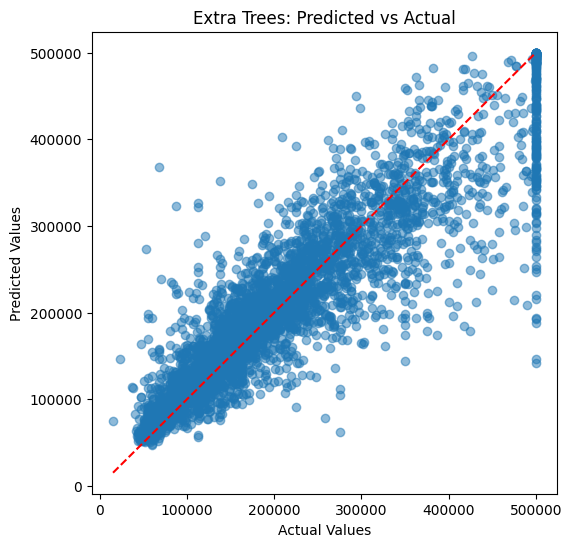

In [7]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # eval metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = [mse, rmse, r2]

    print(f"\n{name} Results:")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")

    # scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name}: Predicted vs Actual")
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        "r--"
    )
    plt.show()

In [8]:
# Summary comparison
results_df = pd.DataFrame(
    results,
    index=["MSE", "RMSE", "R2"]
).T

print("\nModel Comparison:")
print(results_df)



Model Comparison:
                        MSE          RMSE        R2
Decision Tree  4.528796e+09  67296.330037  0.668831
Random Forest  2.378317e+09  48767.994521  0.826085
Extra Trees    2.720827e+09  52161.545619  0.801039


Discussion of Model Differences

The Decision Tree Regressor uses a single tree to make predictions. While it is simple and easy to interpret, it tends to overfit the training data because it tries to perfectly split the dataset. This often results in lower generalization performance on unseen data.

The Random Forest Regressor is an ensemble method that combines predictions from many decision trees trained on different random samples of the data. By averaging multiple trees, it reduces variance and improves prediction accuracy. This makes Random Forest more stable and better at generalizing compared to a single decision tree.

The Extra Trees Regressor is also an ensemble method but introduces additional randomness in how splits are chosen. This can make training faster and sometimes improve robustness to noise. However, the extra randomness may slightly reduce accuracy compared to Random Forest in some cases.

Overall, ensemble methods (Random Forest and Extra Trees) outperform a single decision tree because they reduce overfitting and provide more reliable predictions.
